In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, anderson, kstest, norm, probplot

In [38]:

path = "D:\\boobogo\\coding\\trade\\data\\us100\\data_engineered\\US_TECH100_1min_indicators.csv"
df = pd.read_csv(path, parse_dates=True, index_col='datetime')

In [86]:
df_filtered = df.between_time('12:00', '20:00')
df_filtered.head()

,open_1min,high_1min,low_1min,close_1min,macd_1min,macd_signal_1min,rsi_1min,bb_mavg_1min,bb_upper_1min,bb_lower_1min,bb_hband_indicator_1min,bb_lband_indicator_1min,atr_1min,return
datetime,,,,,,,,,,,,,,
2020-12-02 12:00:00,12437.25,12437.25,12433.50,12436.75,2.11,1.36,63.17,12430.76,12440.54,12420.99,0,0,2.97,-0.000020
2020-12-02 12:01:00,12436.75,12437.25,12435.00,12435.00,2.03,1.49,57.79,12431.14,12440.96,12421.32,0,0,2.92,-0.000141
2020-12-02 12:02:00,12435.50,12436.00,12433.50,12434.00,1.87,1.57,54.92,12431.64,12440.96,12422.32,0,0,2.89,-0.000080
2020-12-02 12:03:00,12434.50,12435.00,12432.25,12433.00,1.65,1.59,52.12,12432.09,12440.74,12423.44,0,0,2.88,-0.000080
2020-12-02 12:04:00,12433.00,12434.00,12431.75,12433.00,1.45,1.56,52.12,12432.60,12440.11,12425.09,0,0,2.84,0.000000


In [87]:
len(df_filtered)

482060

In [88]:
df_filtered['return'] = df_filtered['close_1min'].pct_change()
df_filtered.head()

C:\Users\bolde\AppData\Local\Temp\ipykernel_14668\2413947537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['return'] = df_filtered['close_1min'].pct_change()


,open_1min,high_1min,low_1min,close_1min,macd_1min,macd_signal_1min,rsi_1min,bb_mavg_1min,bb_upper_1min,bb_lower_1min,bb_hband_indicator_1min,bb_lband_indicator_1min,atr_1min,return
datetime,,,,,,,,,,,,,,
2020-12-02 12:00:00,12437.25,12437.25,12433.50,12436.75,2.11,1.36,63.17,12430.76,12440.54,12420.99,0,0,2.97,NaN
2020-12-02 12:01:00,12436.75,12437.25,12435.00,12435.00,2.03,1.49,57.79,12431.14,12440.96,12421.32,0,0,2.92,-0.000141
2020-12-02 12:02:00,12435.50,12436.00,12433.50,12434.00,1.87,1.57,54.92,12431.64,12440.96,12422.32,0,0,2.89,-0.000080
2020-12-02 12:03:00,12434.50,12435.00,12432.25,12433.00,1.65,1.59,52.12,12432.09,12440.74,12423.44,0,0,2.88,-0.000080
2020-12-02 12:04:00,12433.00,12434.00,12431.75,12433.00,1.45,1.56,52.12,12432.60,12440.11,12425.09,0,0,2.84,0.000000


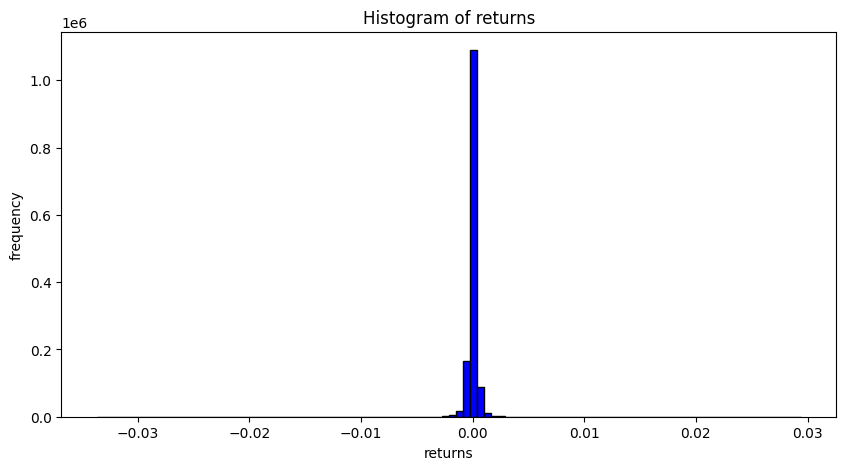

In [89]:
plt.figure(figsize=(10, 5))
plt.hist(df['return'], bins=100, color='blue', edgecolor='black')
plt.title('Histogram of returns')
plt.xlabel('returns')
plt.ylabel('frequency')
plt.show()

In [90]:
# Number of samples and sample size
num_samples = 100
sample_size = 30

# Generate sample means
sample_means = [df['return'].dropna().sample(sample_size, replace=True).mean() for _ in range(num_samples)]

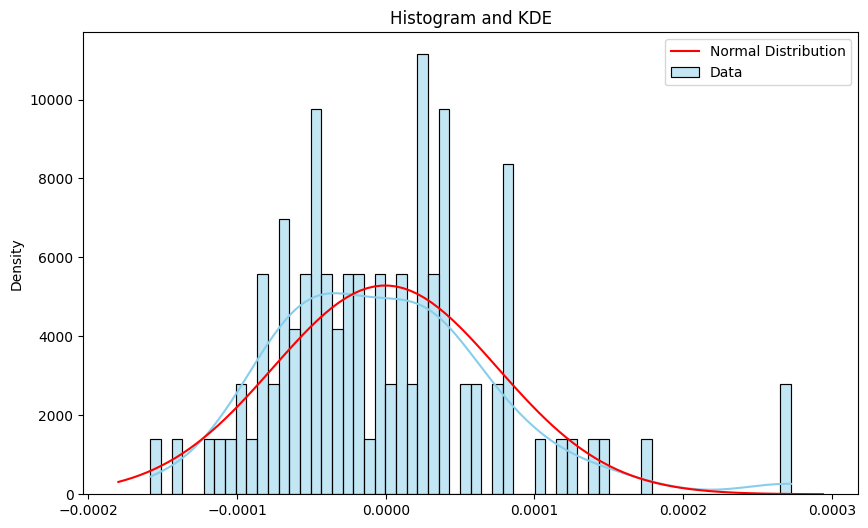

In [91]:
# 1. Plotting Histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, stat="density", bins=60, color="skyblue", label="Data")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(sample_means), np.std(sample_means))
plt.plot(x, p, 'r', label="Normal Distribution")
plt.title("Histogram and KDE")
plt.legend()
plt.show()

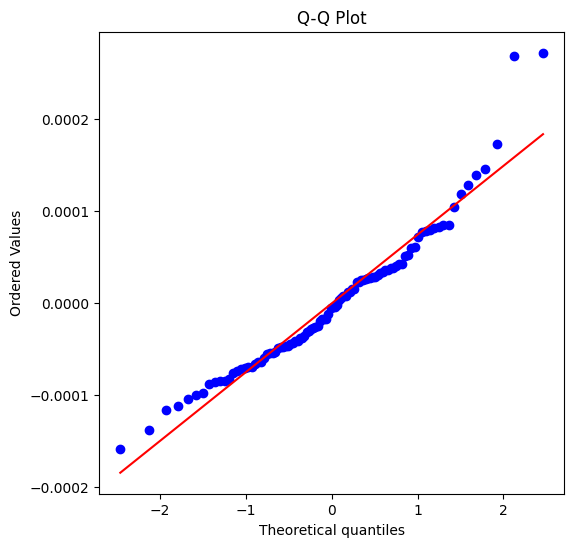

In [92]:
# 2. Q-Q Plot
plt.figure(figsize=(6, 6))
probplot(sample_means, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [93]:
# 3. Statistical Tests
# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(sample_means)
print(f"Shapiro-Wilk Test: p-value = {shapiro_p:.5f}")

Shapiro-Wilk Test: p-value = 0.00065


In [94]:
# Anderson-Darling Test
anderson_result = anderson(sample_means)
print(f"Anderson-Darling Test: Statistic = {anderson_result.statistic:.5f}, "
      f"Critical Values = {anderson_result.critical_values}")

Anderson-Darling Test: Statistic = 0.95912, Critical Values = [0.555 0.632 0.759 0.885 1.053]


In [95]:
# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(sample_means, 'norm', args=(np.mean(sample_means), np.std(sample_means)))
print(f"Kolmogorov-Smirnov Test: p-value = {ks_p:.5f}")

Kolmogorov-Smirnov Test: p-value = 0.44602


In [96]:
len(sample_means)

100